In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
os.chdir('E:\Practical Time Series')

In [4]:
data = pd.read_csv('datasets/WDI_csv/WDIData.csv')

In [5]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')


In [6]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (409992, 63)


In [7]:
nb_indicators = data['Indicator Name'].unique().shape[0]
print('Unique number of indicators:', nb_indicators)

Unique number of indicators: 1553


In [8]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [9]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [10]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 63)
Shape of military_exp: (264, 63)


In [13]:
central_govt_debt['2010'].describe()
military_exp['2010'].describe()

count    191.000000
mean       1.999261
std        1.350623
min        0.148690
25%        1.201177
50%        1.618759
75%        2.640259
max        8.565679
Name: 2010, dtype: float64

In [15]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [16]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot.head(10)

,central_govt_debt,military_exp
AFG,NaN,1.897473
AGO,NaN,4.244884
ALB,NaN,1.558592
ARB,NaN,5.117807
ARE,NaN,6.038592
ARG,NaN,0.814878
ARM,NaN,4.265646
ATG,74.475616,NaN
AUS,29.340860,1.950739
AUT,85.528445,0.824770


In [17]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [18]:
data_to_plot.head()

,central_govt_debt,military_exp
AUS,29.340860,1.950739
AUT,85.528445,0.824770
AZE,6.385576,2.791004
BEL,92.404303,1.084631
BGR,21.597175,1.765384


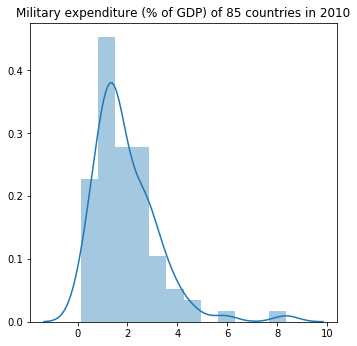

In [24]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')
plt.savefig('plots/Section 1/01_01.png', format='png', dpi=300)

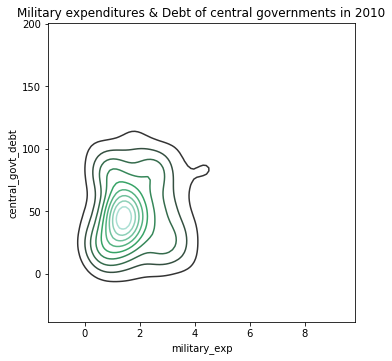

In [26]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')
plt.savefig('plots/Section 1/_01_02.png', format='png', dpi=300)

In [30]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [31]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1960,8.35266,NaN
1961,8.48713,NaN
1962,8.65659,NaN
1963,8.18901,NaN
1964,7.46763,NaN
1965,6.9688,NaN
1966,7.80025,NaN
1967,8.75572,NaN
1968,8.56573,NaN
1969,7.98539,NaN


In [32]:
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 2)


In [33]:
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1989,5.37472,39.017
1990,5.12025,40.8214
1991,4.53985,43.948
1992,4.66626,45.9165
1993,4.32693,48.1047
1994,3.94129,47.2141
1995,3.63849,47.0598
1996,3.35074,46.5855
1997,3.2099,43.9588
1998,3.01764,41.0099


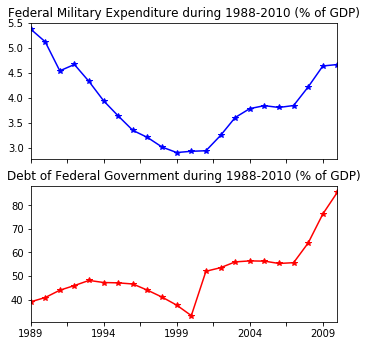

In [34]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])
plt.savefig('plots/Section 1_01_03.png', format='png', dpi=300)

In [39]:
chn = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='CHN'),index0:index1+1
]
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)
usa = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='USA'),index0:index1+1
]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)
ind = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='IND'),index0:index1+1
]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)
gbr = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='GBR'),index0:index1+1
]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

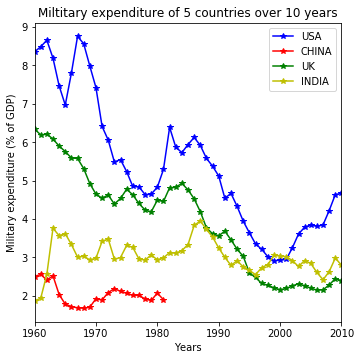

In [40]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')
plt.savefig('plots/Section 1_01_04.png', format='png', dpi=300)